In [2]:
import numpy as np
import matplotlib.pyplot as plt
import radio_beam
import matplotlib
from radio_beam import Beam
from matplotlib import cm
from astropy.io import fits
from astropy.wcs import WCS
from scipy import stats
from astropy.nddata import Cutout2D
from spectral_cube import SpectralCube
from matplotlib.patches import Ellipse
from spectral_cube import BooleanArrayMask
from spectral_cube import LazyMask
from astropy import units as u 
from astropy import coordinates
import regions 
from regions import CircleSkyRegion
from astropy.utils import data
import pylab as pl
from astropy.io import ascii
from matplotlib import rcParams
#import aplpy
import pandas as pd
from scipy.stats import kstest, norm
#import bces
import corner
from matplotlib.patches import Patch

In [4]:
#plots
full_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
# np.set_printoptions(precision=2, suppress=False)
#use Times New Roman font
plt.rcParams['font.family'] = 'serif'
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['xtick.major.size'] = 8
matplotlib.rcParams['ytick.major.size'] = 8
matplotlib.rcParams['xtick.minor.size'] = 4
matplotlib.rcParams['ytick.minor.size'] = 4
matplotlib.rcParams['axes.titlesize'] = 32
matplotlib.rcParams['figure.figsize'] = (14, 8)
# plt.close('all')
plt.rcParams['text.usetex'] = True
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['legend.fontsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 25
matplotlib.rcParams['ytick.labelsize'] = 25
matplotlib.rcParams['xtick.major.size'] = 8
matplotlib.rcParams['ytick.major.size'] = 8
matplotlib.rcParams['axes.titlesize'] = 28
matplotlib.rcParams['figure.figsize'] = (14, 8)
# plt.close('all')
plt.rc('font', family='Times New Roman')
matplotlib.rcParams['font.family'] = "Times New Roman"
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['legend.fontsize'] = 18

In [6]:
tab1 = '~/Desktop/HI/COSMOS_32k_asy.txt'
# Reading the data
data1 = pd.read_csv(tab1, comment='#', sep='\t')

In [5]:
# asymmetry = data1['asy']
# import math

# log_asy=[]
# for i in range(0,len(asymmetry)):
#     if data1['asy'][i]==0:
#         log_asy.append('nan')
#     else:
        
#         log_asy.append(math.log(data1['asy'][i]))
    

# data1['log_asy']=log_asy
# data1.to_csv("~/Desktop/HI/COSMOS_32k_asy.txt", index=False, sep='\t')

In [ ]:
data1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


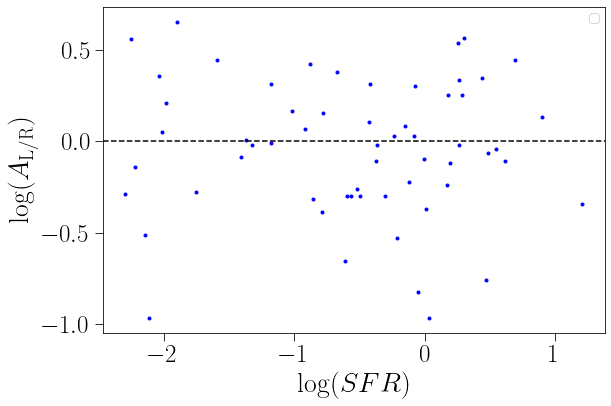

In [6]:

plt.figure(figsize=(9,6))

for x in range(0,len(data1['log_asy'])):
    if data1['log_asy'][x]!='nan':
        if data1['Log(SFR)'][x]>-20:
            plt.scatter(data1['Log(SFR)'][x],data1['log_asy'][x],color='b',marker='.')


plt.xlabel(r'$\log(SFR)$')
plt.ylabel(r'$\log(A_{\mathrm{L}/\mathrm{R}})$')
plt.axhline(y=0, color='k',linestyle='--')

plt.legend(fontsize = 12)

plt.savefig('/Users/apple/Desktop/HI/COSMOS_asy_plots/log-asy-Log(SFR).png',format = 'png', bbox_inches = 'tight', transparent=True)
plt.show()

[7.08  7.694 7.309 6.694 8.809 8.575 8.398 8.505 7.661 9.144 8.842 8.713
 8.262 7.934 8.626 8.713 9.092 8.813 9.037 7.957 9.472 7.916 9.248 9.586
 8.872 9.116 8.801 9.69  8.633 9.712 9.068 9.769 9.274 9.32  8.983 9.725
 9.451 8.491 9.985 9.792 9.524 8.807 8.9   8.744 9.461 8.716 9.263 9.122
 9.508 9.208 9.701 9.315 8.962 9.617 9.837 9.785 9.381 9.166 9.804 9.186
 9.497 9.767 9.548 9.717 9.644 9.508 8.9   8.777 9.577 9.15  8.93 ] [0.51082562 0.35767444 0.55961579 0.28768207 0.0618754  0.13926207
 0.01005034 0.15700375 0.04879016 0.27443685 0.31481074 0.00995033
 0.65232519 0.44468582 0.16551444 0.42526774 0.05129329 0.06765865
 0.11653382 0.96758403 0.26136476 0.20701417 0.38566248 0.08338161
 0.32930375 0.25464222 0.31481074 0.11653382 0.01005034 0.0295588
 0.10436002 0.13102826 0.22314355 0.07257069 0.0861777  0.37106368
 0.12783337 0.37843644 0.05129329 0.16251893 0.30110509 0.25464222
 0.10436002 0.02020271 0.52763274 0.08338161 0.30110509 0.30110509
 0.09431068 0.10536052 0.4446858

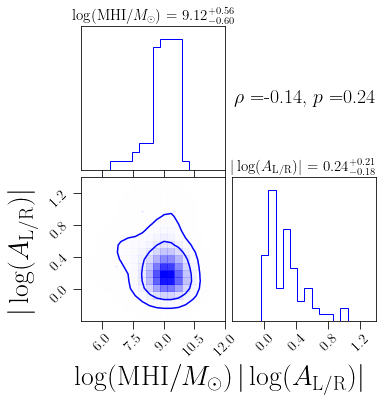

In [25]:
import math
from scipy.stats import spearmanr

log_sfr = data1['Log(MHI)']
log_asy = abs(data1['log_asy'])

# Filter and stack data where log_asy is not 'nan' and Log(SFR) > -20
# datastack = np.vstack([
#     [sfr, asy] for sfr, asy in zip(log_sfr, log_asy) 
#     if asy != 'nan' and sfr > -20
# ]).T
datastack = np.vstack([
    [sfr, np.abs(asy)] for sfr, asy in zip(log_sfr, log_asy) 
    if math.isnan(float(asy))==False and sfr > 0
]).T
print(datastack[0],datastack[1])
coef, p_value = spearmanr(datastack[0],datastack[1])
print(p_value)
print(coef)

hist2d_kwargs = {'plot_density': False}
print(datastack.shape)

figure = corner.corner(datastack.T,smooth=1.5,labels=[r'$\log(\mathrm{MHI}/M_{\odot})$', r'$|\log(A_{\mathrm{L}/\mathrm{R}})|$'],
                       show_titles=True, title_kwargs={"fontsize": 15},color='blue', hist_kwargs={'color':'blue','density':True},levels=[0.68, 0.90],figsize=(10,10),plot_density=True,bins=20,range=[(5, 12), (-0.4, 1.4)])


for ax in figure.get_axes():
    ax.tick_params(axis='both', which='major', labelsize=14)  # Set major tick font size
    ax.tick_params(axis='both', which='minor', labelsize=12)  # Set minor tick font size

axes = np.array(figure.axes).reshape((2, 2))


figure.axes[1].text(0.5, 0.5, r'$\rho=$'+str(np.round(coef,2))+', '+'$p=$'+str(np.round(p_value,2)), fontsize=20, ha='center',va='center'
              )
figure.savefig('./COSMOS_asy_plots/corner_log_MHI.pdf', bbox_inches='tight')

plt.show()




In [46]:

# Sample data
data1_ = np.random.normal(0, 1, 100000)  # Sample from a normal distribution
data2_ = np.random.normal(0, 1, 100000)  # Another sample from a normal distribution

# Perform KS test
statistic, p_value = ks_2samp(data1_, data2_)

print(f"KS statistic: {statistic}")
print(f"P-value: {p_value}")

KS statistic: 0.0042099999999999915
P-value: 0.3372453287571461


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0
1
2
3
8


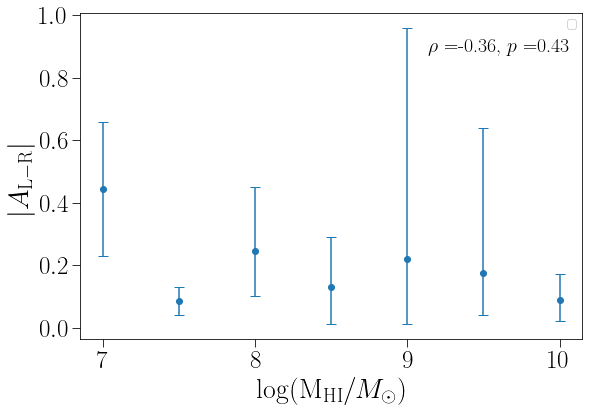

In [23]:
# fig 5.1 in (Glowacki et al., 2022)
plt.figure(figsize=(9,6))

#set up bins 
bin_65=[]
asy_65=[]
bin_7=[]
asy_7=[]
bin_75=[]
asy_75=[]
bin_8=[]
asy_8=[]
bin_85=[]
asy_85=[]
bin_9=[]
asy_9=[]
bin_95=[]
asy_95=[]
bin_10=[]
asy_10=[]
for x in range(0,len(data1['Asy_l'])):
    if data1['Asy_l'][x]!=0:
        
        if data1['Log(MHI)'][x]<7.25 and data1['Log(MHI)'][x]>6.5:
            bin_7.append(data1['Log(MHI)'][x])
            print(x)
            asy_7.append(abs(data1['Asy_l'][x]))
        if data1['Log(MHI)'][x]>7.25 and data1['Log(MHI)'][x]<7.75:
            bin_75.append(data1['Log(MHI)'][x])
            print(x)
            asy_75.append(abs(data1['Asy_l'][x]))
            
        if data1['Log(MHI)'][x]<8.25 and data1['Log(MHI)'][x]>7.75:
            bin_8.append(data1['Log(MHI)'][x])
            asy_8.append(abs(data1['Asy_l'][x]))
        if data1['Log(MHI)'][x]<8.75 and data1['Log(MHI)'][x]>8.25:
            bin_85.append(data1['Log(MHI)'][x])
            asy_85.append(abs(data1['Asy_l'][x]))
        if data1['Log(MHI)'][x]<9.25 and data1['Log(MHI)'][x]>8.75:
            bin_9.append(data1['Log(MHI)'][x])
            asy_9.append(abs(data1['Asy_l'][x]))
        if data1['Log(MHI)'][x]<9.75 and data1['Log(MHI)'][x]>9.25:
            bin_95.append(data1['Log(MHI)'][x])
            asy_95.append(abs(data1['Asy_l'][x]))            
        if data1['Log(MHI)'][x]<10.25 and data1['Log(MHI)'][x]>9.75:
            bin_10.append(data1['Log(MHI)'][x])
            asy_10.append(abs(data1['Asy_l'][x]))


avg_asy = []
error_bars = []

for asy_bin in [asy_7,asy_75, asy_8,asy_85, asy_9, asy_95,asy_10]:
    avg_asy.append(np.mean(asy_bin))
    error_bars.append([np.min(asy_bin), np.max(asy_bin)])

# Convert error bars to a format suitable for plotting (distance from the mean)
error_bars = [(avg - error[0], error[1] - avg) for avg, error in zip(avg_asy, error_bars)]

x_coords = [7,7.5, 8,8.5, 9,9.5, 10]

coef, p_value = spearmanr(x_coords,avg_asy)
# Plotting
plt.errorbar(x_coords, avg_asy, yerr=np.transpose(error_bars), fmt='o', capsize=5)

#plt.xticks(x_coords, ['6.5-7.5', '7.5-8.5', '8.5-9.5', '9.5-10.5'])


plt.xlabel(r'$\log(\mathrm{M}_\mathrm{HI}/M_{\odot})$')
plt.ylabel(r'$|A_{\mathrm{L}-\mathrm{R}}|$')
#plt.axhline(y=0, color='k',linestyle='--')
plt.text(9.6, 0.9, r'$\rho=$'+str(np.round(coef,2))+', '+'$p=$'+str(np.round(p_value,2)), fontsize=20, ha='center',va='center')

plt.legend(fontsize = 12)

plt.savefig('/Users/apple/Desktop/HI/COSMOS_asy_plots/Al-MHI-Glowacki.png',format = 'png', bbox_inches = 'tight', transparent=True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


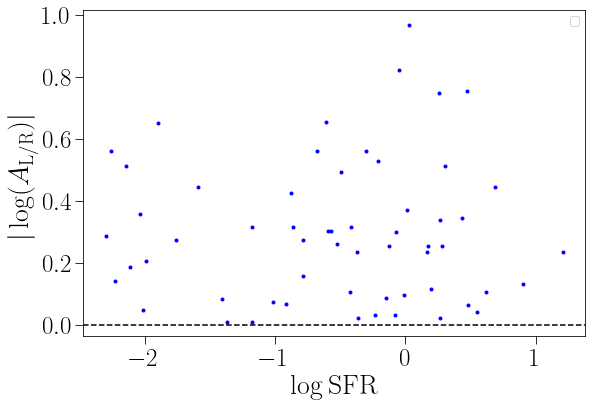

In [25]:

plt.figure(figsize=(9,6))

for x in range(0,len(data1['log_asy'])):
    if data1['log_asy'][x]!='nan' and data1['Log(SFR)'][x]>-98:
        plt.scatter(data1['Log(SFR)'][x],data1['log_asy'][x],color='b',marker='.')
        


plt.xlabel(r'$\log \mathrm{SFR}$')
plt.ylabel(r'$|\log(A_{\mathrm{L}/\mathrm{R}})|$')
plt.axhline(y=0, color='k',linestyle='--')

plt.legend(fontsize = 12)

plt.savefig('/Users/apple/Desktop/HI/COSMOS_asy_plots/log-asy-SFR.pdf',format = 'pdf', bbox_inches = 'tight', transparent=True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0
1
2
3
5
8
9
12
13
19
21
[1.29, 1.37, 0.89, 1.03, 1.11, 1.29, 1.09, 0.69, 1.29, 0.59, 0.57, 0.61, 0.91, 0.79, 0.44, 0.94, 0.98, 1.03, 2.11, 0.38, 1.41, 0.79, 0.98, 1.35, 1.67, 1.4, 0.47]
[1.1590909090909092, 0.9213333333333333, 1.0174074074074073, 1.1400000000000001]


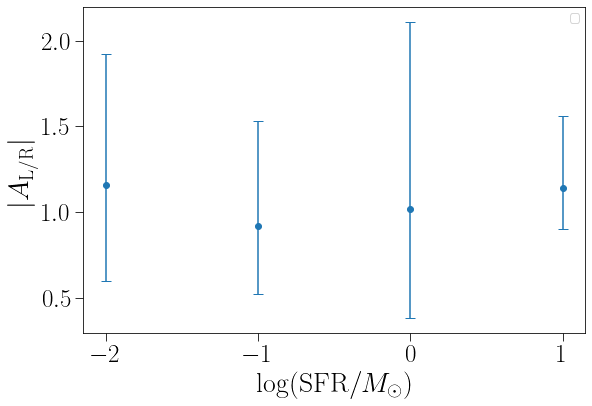

In [28]:
# fig 5.1 in (Glowacki et al., 2022)
plt.figure(figsize=(9,6))

#set up bins 
bin_7=[]
asy_7=[]
bin_8=[]
asy_8=[]
bin_9=[]
asy_9=[]
bin_10=[]
asy_10=[]
for x in range(0,len(data1['log_asy'])):
    if data1['asy'][x]!=0:
        if data1['Log(SFR)'][x]<-1.5 and data1['Log(SFR)'][x]>-2.5:
            bin_7.append(data1['Log(SFR)'][x])
            print(x)
            asy_7.append(abs(data1['asy'][x]))
            
        if data1['Log(SFR)'][x]<-0.5 and data1['Log(SFR)'][x]>-1.5:
            bin_8.append(data1['Log(SFR)'][x])
            asy_8.append(abs(data1['asy'][x]))
        if data1['Log(SFR)'][x]<0.5 and data1['Log(SFR)'][x]>-0.5:
            bin_9.append(data1['Log(SFR)'][x])
            asy_9.append(abs(data1['asy'][x]))           
        if data1['Log(SFR)'][x]<1 and data1['Log(SFR)'][x]>0.5:
            bin_10.append(data1['Log(SFR)'][x])
            asy_10.append(abs(data1['asy'][x]))

print(asy_9)
avg_asy = []
error_bars = []

for asy_bin in [asy_7, asy_8, asy_9, asy_10]:
    avg_asy.append(np.mean(asy_bin))
    error_bars.append([np.min(asy_bin), np.max(asy_bin)])

# Convert error bars to a format suitable for plotting (distance from the mean)
error_bars = [(avg - error[0], error[1] - avg) for avg, error in zip(avg_asy, error_bars)]

x_coords = [-2, -1, 0, 1]
print(avg_asy)
# Plotting
plt.errorbar(x_coords, avg_asy, yerr=np.transpose(error_bars), fmt='o', capsize=5)

#plt.xticks(x_coords, ['6.5-7.5', '7.5-8.5', '8.5-9.5', '9.5-10.5'])


plt.xlabel(r'$\log(\mathrm{SFR}/M_{\odot})$')
plt.ylabel(r'$|A_{\mathrm{L}/\mathrm{R}}|$')
#plt.axhline(y=0, color='k',linestyle='--')

plt.legend(fontsize = 12)

plt.savefig('/Users/apple/Desktop/HI/COSMOS_asy_plots/Al-SFR-Glowacki.png',format = 'png', bbox_inches = 'tight', transparent=True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


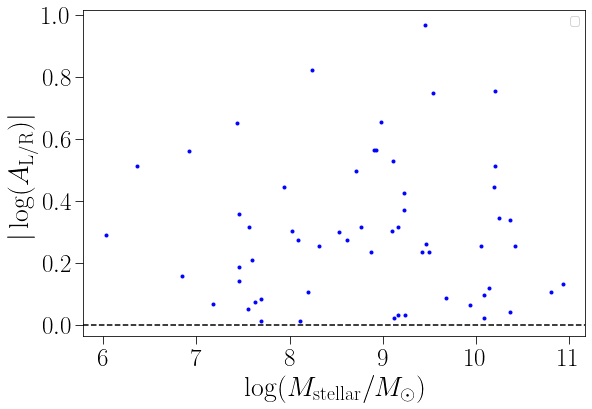

In [29]:

plt.figure(figsize=(9,6))

for x in range(0,len(data1['log_asy'])):
    if data1['log_asy'][x]!='nan' and data1['Log(SFR)'][x]>-98:
        plt.scatter(data1['Log(Mstellar)'][x],data1['log_asy'][x],color='b',marker='.')
        


plt.xlabel(r'$\log(M_{\mathrm{stellar}}/M_{\odot})$')
plt.ylabel(r'$|\log(A_{\mathrm{L}/\mathrm{R}})|$')
plt.axhline(y=0, color='k',linestyle='--')

plt.legend(fontsize = 12)

plt.savefig('/Users/apple/Desktop/HI/COSMOS_asy_plots/log-asy-Mste.pdf',format = 'pdf', bbox_inches = 'tight', transparent=True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.675, 1.2914285714285714, 1.0307692307692309, 0.8295, 1.212142857142857, 1.02]


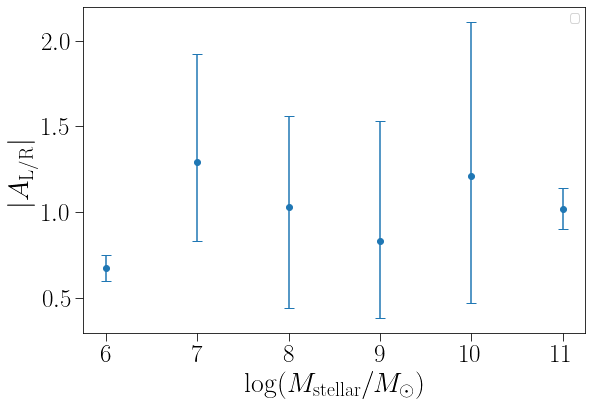

In [30]:
# fig 5.1 in (Glowacki et al., 2022)
plt.figure(figsize=(9,6))

#set up bins 
bin_6=[]
asy_6=[]
bin_7=[]
asy_7=[]
bin_8=[]
asy_8=[]
bin_9=[]
asy_9=[]
bin_10=[]
asy_10=[]
bin_11=[]
asy_11=[]
for x in range(0,len(data1['log_asy'])):
    if data1['asy'][x]!=0:
        if data1['Log(Mstellar)'][x]<6.5 and data1['Log(Mstellar)'][x]>5.5:
            bin_6.append(data1['Log(Mstellar)'][x])   
            asy_6.append(abs(data1['asy'][x]))
        if data1['Log(Mstellar)'][x]<7.5 and data1['Log(Mstellar)'][x]>6.5:
            bin_7.append(data1['Log(Mstellar)'][x])           
            asy_7.append(abs(data1['asy'][x]))
            
        if data1['Log(Mstellar)'][x]<8.5 and data1['Log(Mstellar)'][x]>7.5:
            bin_8.append(data1['Log(Mstellar)'][x])
            asy_8.append(abs(data1['asy'][x]))
        if data1['Log(Mstellar)'][x]<9.5 and data1['Log(Mstellar)'][x]>8.5:
            bin_9.append(data1['Log(Mstellar)'][x])
            asy_9.append(abs(data1['asy'][x]))
        if data1['Log(Mstellar)'][x]<10.5 and data1['Log(Mstellar)'][x]>9.5:
            bin_10.append(data1['Log(Mstellar)'][x])
            asy_10.append(abs(data1['asy'][x]))
        if data1['Log(Mstellar)'][x]<11.5 and data1['Log(Mstellar)'][x]>10.5:
            bin_11.append(data1['Log(Mstellar)'][x])
            asy_11.append(abs(data1['asy'][x]))


avg_asy = []
error_bars = []

for asy_bin in [asy_6,asy_7, asy_8, asy_9, asy_10,asy_11]:
    avg_asy.append(np.mean(asy_bin))
    error_bars.append([np.min(asy_bin), np.max(asy_bin)])

# Convert error bars to a format suitable for plotting (distance from the mean)
error_bars = [(avg - error[0], error[1] - avg) for avg, error in zip(avg_asy, error_bars)]

x_coords = [6,7,8,9,10,11]
print(avg_asy)
# Plotting
plt.errorbar(x_coords, avg_asy, yerr=np.transpose(error_bars), fmt='o', capsize=5)

#plt.xticks(x_coords, ['6.5-7.5', '7.5-8.5', '8.5-9.5', '9.5-10.5'])


plt.xlabel(r'$\log(M_{\mathrm{stellar}}/M_{\odot})$')
plt.ylabel(r'$|A_{\mathrm{L}/\mathrm{R}}|$')
#plt.axhline(y=0, color='k',linestyle='--')

plt.legend(fontsize = 12)

plt.savefig('/Users/apple/Desktop/HI/COSMOS_asy_plots/Al-Mste-Glowacki.png',format = 'png', bbox_inches = 'tight', transparent=True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


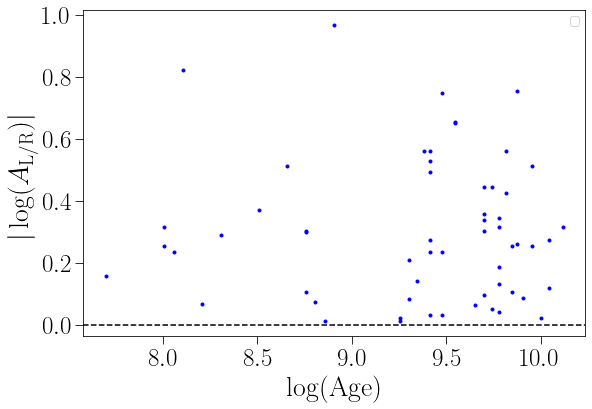

In [32]:

plt.figure(figsize=(9,6))

for x in range(0,len(data1['log_asy'])):
    if data1['log_asy'][x]!='nan' and data1['Log(Age)'][x]!=0:
        plt.scatter(data1['Log(Age)'][x],data1['log_asy'][x],color='b',marker='.')
        


plt.xlabel(r'$\log(\mathrm{Age})$')
plt.ylabel(r'$|\log(A_{\mathrm{L}/\mathrm{R}})|$')
plt.axhline(y=0, color='k',linestyle='--')

plt.legend(fontsize = 12)

plt.savefig('/Users/apple/Desktop/HI/COSMOS_asy_plots/log-asy-Age.pdf',format = 'pdf', bbox_inches = 'tight', transparent=True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.44, 1.37]
[0.6, 0.75]
[0.38, 1.35]
[0.52, 2.11]
[0.47, 1.67]
[0.9920000000000002, 0.68, 0.9166666666666666, 1.0828, 1.0361111111111112]


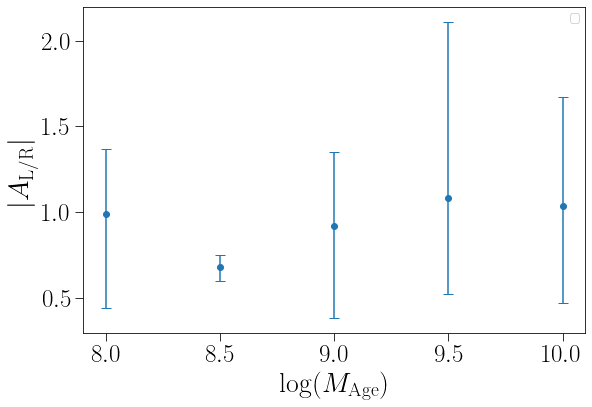

In [36]:
# fig 5.1 in (Glowacki et al., 2022)
plt.figure(figsize=(9,6))

#set up bins 
bin_6=[]
asy_6=[]
bin_7=[]
asy_7=[]
bin_8=[]
asy_8=[]
bin_9=[]
asy_9=[]
bin_10=[]
asy_10=[]
bin_11=[]
asy_11=[]
for x in range(0,len(data1['log_asy'])):
    if data1['asy'][x]!=0:
        if data1['Log(Age)'][x]<8.25 and data1['Log(Age)'][x]>7.75:
            bin_6.append(data1['Log(Age)'][x])   
            asy_6.append(abs(data1['asy'][x]))
        if data1['Log(Age)'][x]<8.75 and data1['Log(Age)'][x]>8.25:
            bin_7.append(data1['Log(Age)'][x])   
            asy_7.append(abs(data1['asy'][x]))
            
        if data1['Log(Age)'][x]<9.25 and data1['Log(Age)'][x]>8.75:
            bin_8.append(data1['Log(Age)'][x])   
            asy_8.append(abs(data1['asy'][x]))
        if data1['Log(Age)'][x]<9.75 and data1['Log(Age)'][x]>9.25:
            bin_9.append(data1['Log(Age)'][x])   
            asy_9.append(abs(data1['asy'][x]))
        if data1['Log(Age)'][x]<10.25 and data1['Log(Age)'][x]>9.75:
            bin_10.append(data1['Log(Age)'][x])   
            asy_10.append(abs(data1['asy'][x]))
        

avg_asy = []
error_bars = []

for asy_bin in [asy_6,asy_7, asy_8, asy_9, asy_10]:
    avg_asy.append(np.mean(asy_bin))
    print([np.min(asy_bin), np.max(asy_bin)])
    error_bars.append([np.min(asy_bin), np.max(asy_bin)])

# Convert error bars to a format suitable for plotting (distance from the mean)
error_bars = [(avg - error[0], error[1] - avg) for avg, error in zip(avg_asy, error_bars)]

x_coords = [8,8.5,9,9.5,10]
print(avg_asy)
# Plotting
plt.errorbar(x_coords, avg_asy, yerr=np.transpose(error_bars), fmt='o', capsize=5)

#plt.xticks(x_coords, ['6.5-7.5', '7.5-8.5', '8.5-9.5', '9.5-10.5'])


plt.xlabel(r'$\log(M_{\mathrm{Age}})$')
plt.ylabel(r'$|A_{\mathrm{L}/\mathrm{R}}|$')
#plt.axhline(y=0, color='k',linestyle='--')

plt.legend(fontsize = 12)

plt.savefig('/Users/apple/Desktop/HI/COSMOS_asy_plots/Al-MAge-Glowacki.png',format = 'png', bbox_inches = 'tight', transparent=True)
plt.show()
